In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [ ]:
lip=pd.read_csv('final_review_dataset.csv')

In [ ]:
lip.head()

,Unnamed: 0,title,link,lprice,brand,star,message
0,0,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,4,선물도 주시고 편지도 써주시고 너무좋았어요.\n색상도 원하던 색상이라 맘에 들어요....
1,1,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,우선 포장 이쁘게 해주셔서 감사하고 롯데택배 진짜 배송빨라요 앞으로 백화점화장품이나...
2,2,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,두 제품 다 매끄럽고 부드럽게 발려요. 그리고 많이 건조하지 않고 겉은 매끈 속은 ...
3,3,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,평생을 웜톤으로 생각하고 살았는데 퍼스널 컬러 컨설팅을 해보니 제가 겨울딥톤이라고해...
4,4,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,"*힌스 무드인핸서 리퀴드 글로우, 인뎁스 (찾아보기 힘든 분위기 있는 색감. 아마 ..."


In [ ]:
review=lip['message']

In [ ]:
review

0        선물도 주시고 편지도 써주시고 너무좋았어요.\n색상도 원하던 색상이라 맘에 들어요....
1        우선 포장 이쁘게 해주셔서 감사하고 롯데택배 진짜 배송빨라요 앞으로 백화점화장품이나...
2        두 제품 다 매끄럽고 부드럽게 발려요. 그리고 많이 건조하지 않고 겉은 매끈 속은 ...
3        평생을 웜톤으로 생각하고 살았는데 퍼스널 컬러 컨설팅을 해보니 제가 겨울딥톤이라고해...
4        *힌스 무드인핸서 리퀴드 글로우, 인뎁스 (찾아보기 힘든 분위기 있는 색감. 아마 ...
                               ...                        
14109          언젠가 누군가에게 받은템~ 써보니 좋더라구요^^ 구매템들 모두 굿~~ 잘쓸께요
14110             립밤처럼 막 바르기 딱 좋아요. 다른거 쓰다가 세일할때 미리 구매했어요.
14111              항상 쓰는거라 너무 좋아요~발색도 적당히 되고 촉촉함도 오래 지속돼요~
14112                 립밤으로 활용하기엔 다소 건조하지만 자연스러운 발색에 부드러워요!
14113               발림성도 죠쿠 색상도 딱 이쁜핑크예요~ 가성비 정말 짱입니당!!!!호
Name: message, Length: 14114, dtype: object

In [ ]:
lip['star'].value_counts().sort_index()

1      117
2      142
3      494
4     1850
5    11511
Name: star, dtype: int64

In [ ]:
lip.groupby('star')['lprice'].mean()

star
1    18767.435897
2    14105.049296
3    14249.497976
4    13755.670270
5    17003.491530
Name: lprice, dtype: float64

# 워드클라우드

## 전체

In [ ]:
message = ' '.join(lip['message'])

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)

In [ ]:
message_N = [word for word in message_N if word != ('립스틱','립틴트')]

In [ ]:
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 6529
색상 : 5899
컬러 : 5172
틴트 : 4618
구매 : 4343
제품 : 4099
느낌 : 3930
발색 : 3821
립스틱 : 3255
지속 : 3171
핑크 : 3120
사용 : 2981
발림 : 2691
매트 : 2607
생각 : 2426
발라 : 2395
진짜 : 2359
정말 : 2197
레드 : 2018
착색 : 1733
색도 : 1701
배송 : 1581
각질 : 1477
다른 : 1452
살짝 : 1427
마음 : 1425
쿨톤 : 1410
코랄 : 1388
조금 : 1345
추천 : 1344
정도 : 1334
사진 : 1334
처음 : 1319
색감 : 1287
보고 : 1273
마스크 : 1230
케이스 : 1168
하나 : 1161
베이스 : 1106
선물 : 1078
약간 : 1038
벨벳 : 1014
웜톤 : 998
가격 : 951
아주 : 944
그냥 : 924
주문 : 921
색깔 : 914
한번 : 898
오렌지 : 895
구입 : 892
얼굴 : 886
완전 : 877


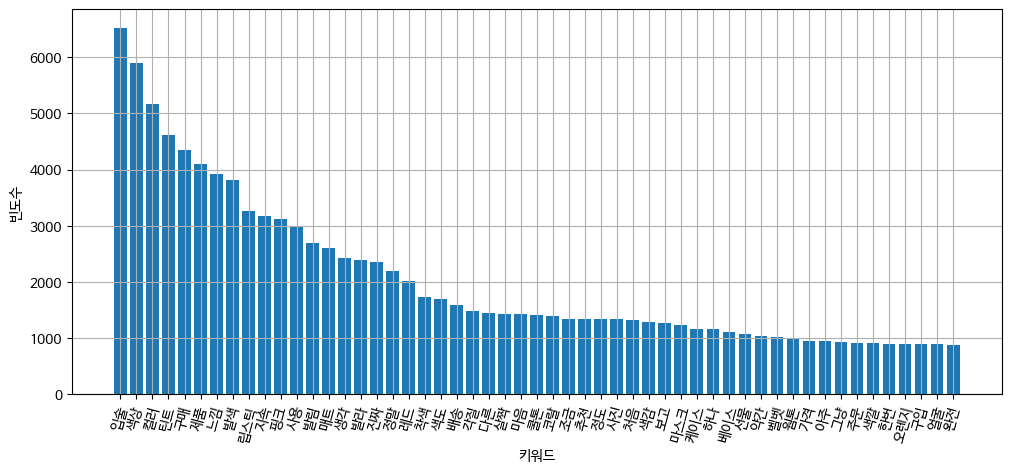

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center',)
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

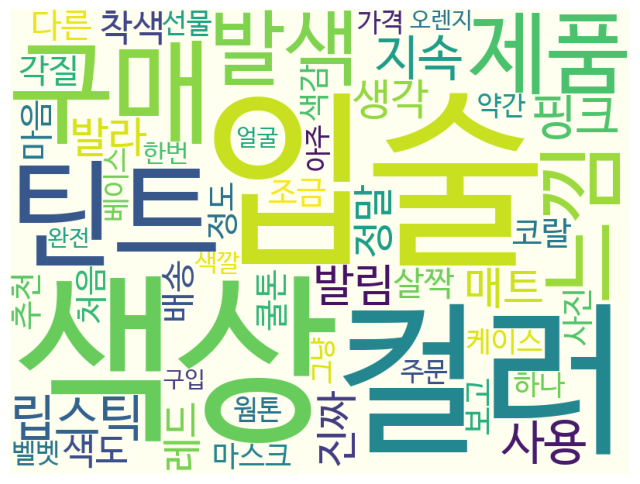

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 별점5

In [ ]:
star5=lip[lip['star']==5]
star5

,Unnamed: 0,title,link,lprice,brand,star,message
1,1,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,우선 포장 이쁘게 해주셔서 감사하고 롯데택배 진짜 배송빨라요 앞으로 백화점화장품이나...
2,2,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,두 제품 다 매끄럽고 부드럽게 발려요. 그리고 많이 건조하지 않고 겉은 매끈 속은 ...
3,3,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,평생을 웜톤으로 생각하고 살았는데 퍼스널 컬러 컨설팅을 해보니 제가 겨울딥톤이라고해...
4,4,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,"*힌스 무드인핸서 리퀴드 글로우, 인뎁스 (찾아보기 힘든 분위기 있는 색감. 아마 ..."
5,5,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,"매장까지 가기 귀찮았는데,, 공홈에서 본품+미니맥+샘플키트 구성으로 저렴하게 구매할..."
...,...,...,...,...,...,...,...
14109,14109,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,언젠가 누군가에게 받은템~ 써보니 좋더라구요^^ 구매템들 모두 굿~~ 잘쓸께요
14110,14110,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,립밤처럼 막 바르기 딱 좋아요. 다른거 쓰다가 세일할때 미리 구매했어요.
14111,14111,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,항상 쓰는거라 너무 좋아요~발색도 적당히 되고 촉촉함도 오래 지속돼요~
14112,14112,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,립밤으로 활용하기엔 다소 건조하지만 자연스러운 발색에 부드러워요!


In [ ]:
message = ' '.join(star5['message'])

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]

In [ ]:
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 5252
색상 : 4907
컬러 : 4481
틴트 : 3883
구매 : 3592
제품 : 3427
느낌 : 3216
발색 : 3052
립스틱 : 2848
핑크 : 2526
지속 : 2503
사용 : 2487
매트 : 2253
발림 : 2208
진짜 : 2105
발라 : 2026
정말 : 1915
생각 : 1860
레드 : 1698
색도 : 1454
착색 : 1390
배송 : 1296
마음 : 1247
각질 : 1208
추천 : 1197
쿨톤 : 1193
코랄 : 1189
다른 : 1189
살짝 : 1134
처음 : 1087
색감 : 1085
정도 : 1074
사진 : 1065
보고 : 1044
마스크 : 1039
조금 : 1022
케이스 : 971
하나 : 965
선물 : 930
베이스 : 909
벨벳 : 880
웜톤 : 870
아주 : 844
약간 : 823
완전 : 778
얼굴 : 769
가격 : 766
한번 : 761
색깔 : 750
일리 : 748
주문 : 747
이번 : 742
구입 : 738


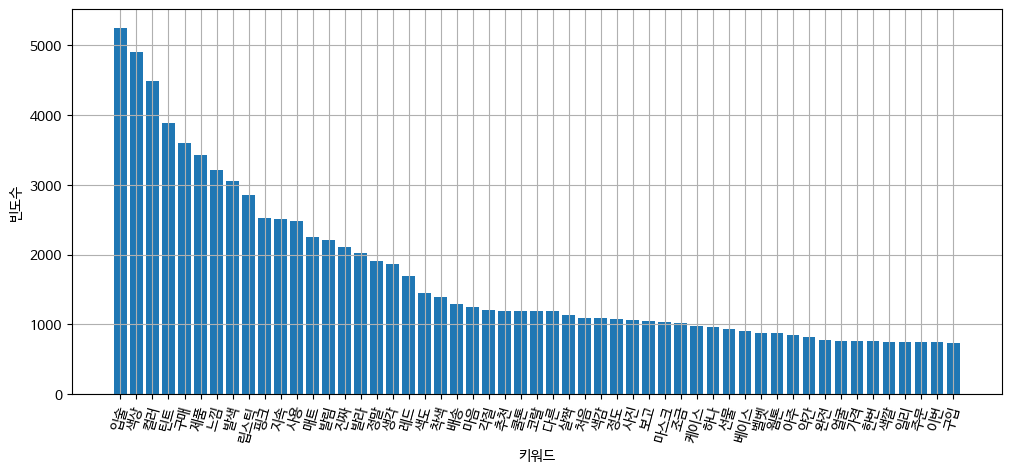

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

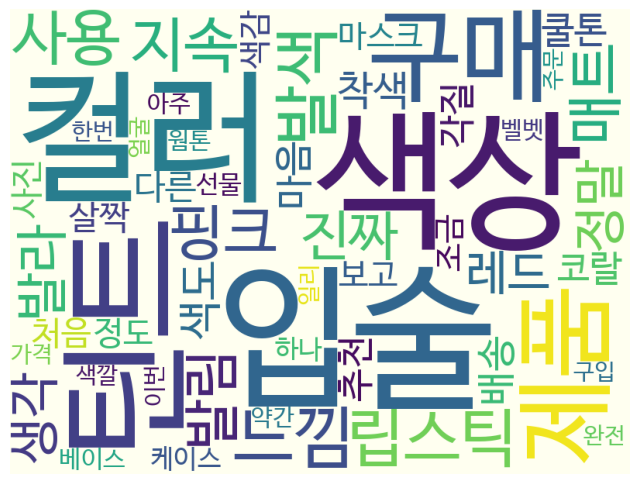

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


## 별점4

In [ ]:
star4=lip[lip['star']==4]

In [ ]:
message = ' '.join(star4['message'])

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]

In [ ]:
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 832
색상 : 744
틴트 : 527
발색 : 521
컬러 : 504
구매 : 496
느낌 : 494
지속 : 477
핑크 : 418
생각 : 406
제품 : 387
발림 : 366
사용 : 359
매트 : 279
립스틱 : 273
발라 : 265
레드 : 244
살짝 : 237
조금 : 234
착색 : 231
각질 : 200
정말 : 197
색도 : 178
다른 : 174
배송 : 166
약간 : 163
처음 : 161
베이스 : 161
정도 : 157
쿨톤 : 154
진짜 : 152
그냥 : 150
색감 : 147
케이스 : 146
보고 : 146
사진 : 145
마스크 : 143
마음 : 138
편이 : 138
가격 : 137
오렌지 : 137
코랄 : 136
하나 : 128
색깔 : 127
립밤 : 119
구입 : 115
추천 : 111
시간 : 110
다만 : 107
벨벳 : 103
주문 : 103
일리 : 99


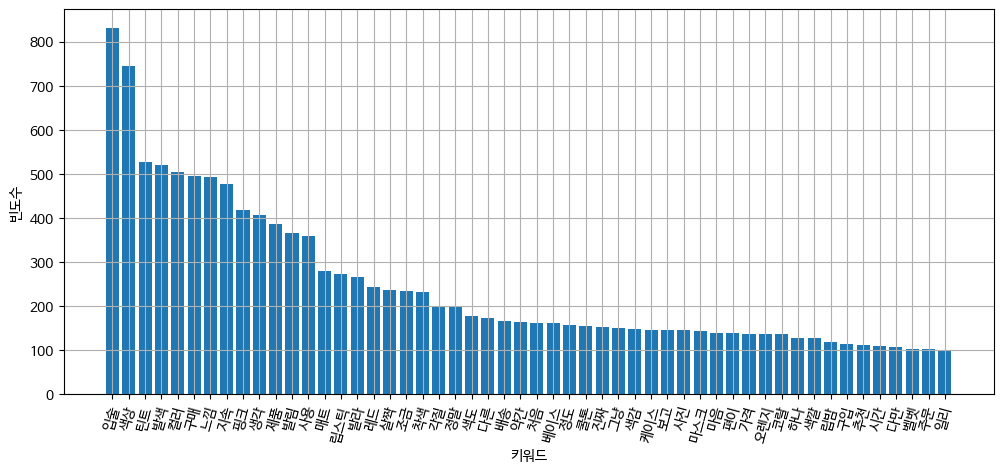

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

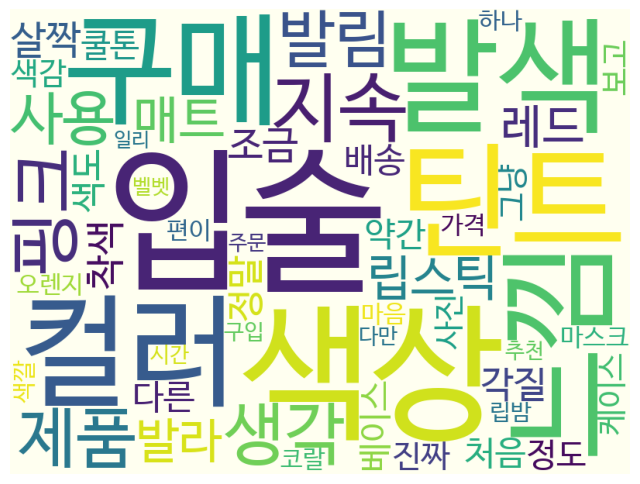

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


## 별점3

In [ ]:
star3=lip[lip['star']==3]

In [ ]:
message = ' '.join(star3['message'])

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]

In [ ]:
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 287
발색 : 180
색상 : 164
구매 : 151
느낌 : 149
지속 : 143
제품 : 142
틴트 : 135
컬러 : 132
핑크 : 124
생각 : 106
발림 : 92
발라 : 73
사용 : 73
착색 : 72
립스틱 : 71
사진 : 70
조금 : 65
정도 : 62
매트 : 60
그냥 : 59
정말 : 58
진짜 : 53
보고 : 52
배송 : 51
레드 : 51
다른 : 50
살짝 : 48
쿨톤 : 48
색도 : 45
색감 : 44
약간 : 42
각질 : 42
오렌지 : 40
하나 : 38
주문 : 36
가격 : 35
케이스 : 34
별로 : 32
일단 : 32
성은 : 32
처음 : 32
코랄 : 32
거의 : 31
마스크 : 31
사람 : 30
부분 : 29
피부 : 29


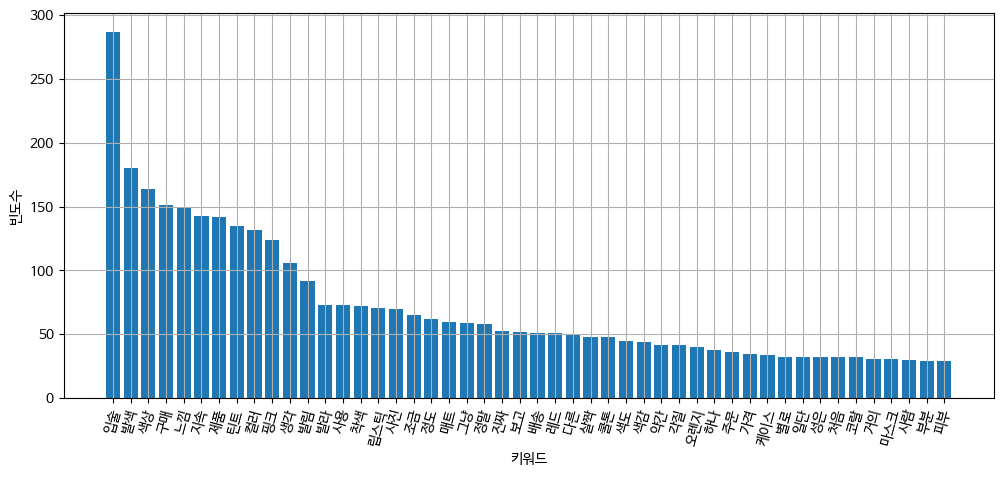

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

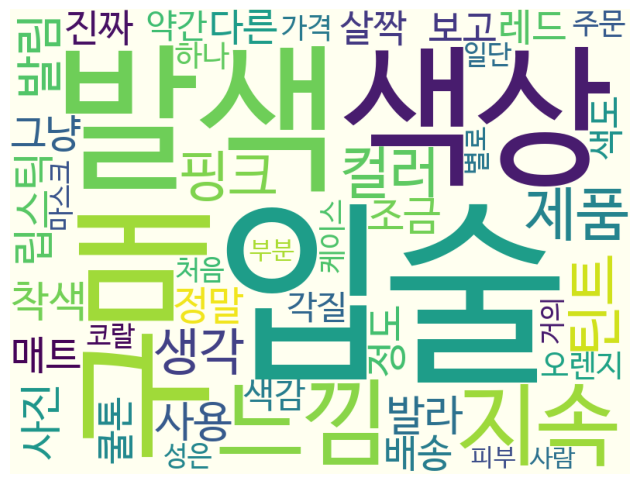

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


## 별점2

In [ ]:
star2=lip[lip['star']==2]

In [ ]:
message = ' '.join(star2['message'])

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]

In [ ]:
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 101
제품 : 68
구매 : 59
느낌 : 57
색상 : 50
틴트 : 45
발색 : 44
그냥 : 37
지속 : 36
생각 : 36
립스틱 : 35
포장 : 31
배송 : 31
사용 : 31
컬러 : 31
핑크 : 28
착색 : 26
정도 : 25
진짜 : 23
선물 : 22
사진 : 20
주문 : 19
처음 : 19
별로 : 19
정말 : 18
발림 : 18
하나 : 17
보고 : 17
조금 : 17
달라 : 15
다른 : 15
시간 : 15
발라 : 15
마음 : 14
소품 : 13
이건 : 13
반품 : 13
사람 : 13
코랄 : 13
상품 : 13
얼굴 : 12
각질 : 12
레드 : 12
부분 : 12
마스크 : 12
추천 : 12
가을 : 11
택배 : 11
후기 : 11
때문 : 11
판매 : 10
다시 : 10
제일 : 10
거의 : 10


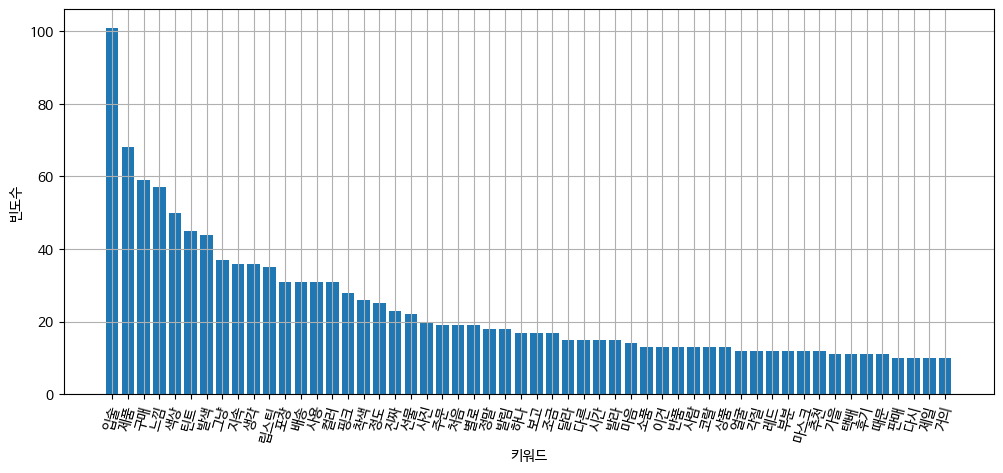

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

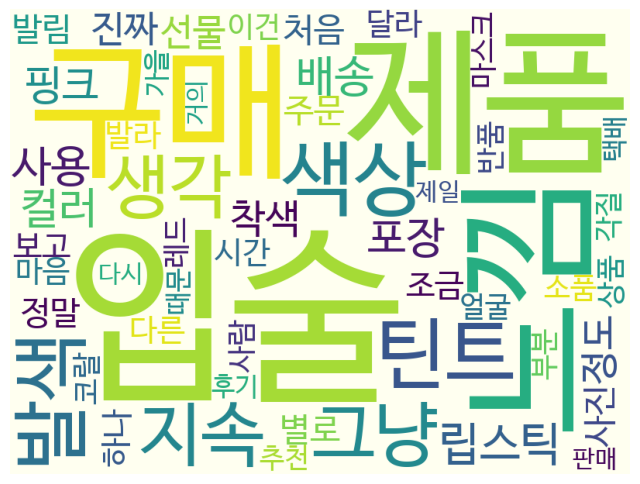

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 별점1

In [ ]:
star1=lip[lip['star']==1]

In [ ]:
message = ' '.join(star1['message'])

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]

In [ ]:
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

제품 : 75
입술 : 57
구매 : 45
상품 : 41
배송 : 37
색상 : 34
사진 : 34
선물 : 31
사용 : 31
그냥 : 30
포장 : 29
립스틱 : 28
틴트 : 28
진짜 : 26
반품 : 26
다른 : 24
컬러 : 24
발색 : 24
핑크 : 24
기한 : 20
처음 : 20
확인 : 19
생각 : 18
판매 : 18
코랄 : 18
문의 : 17
유통 : 16
발라 : 16
주문 : 16
다시 : 16
정도 : 16
물건 : 15
각질 : 15
색도 : 15
답변 : 14
보고 : 14
기분 : 14
착색 : 14
느낌 : 14
환불 : 13
교환 : 13
하나 : 13
레드 : 13
백화점 : 12
롯데 : 12
쇼핑 : 12
시간 : 12
지속 : 12
여기 : 11
직접 : 11
부분 : 11
요청 : 11
박스 : 11
실망 : 11
고객 : 10
한번 : 10


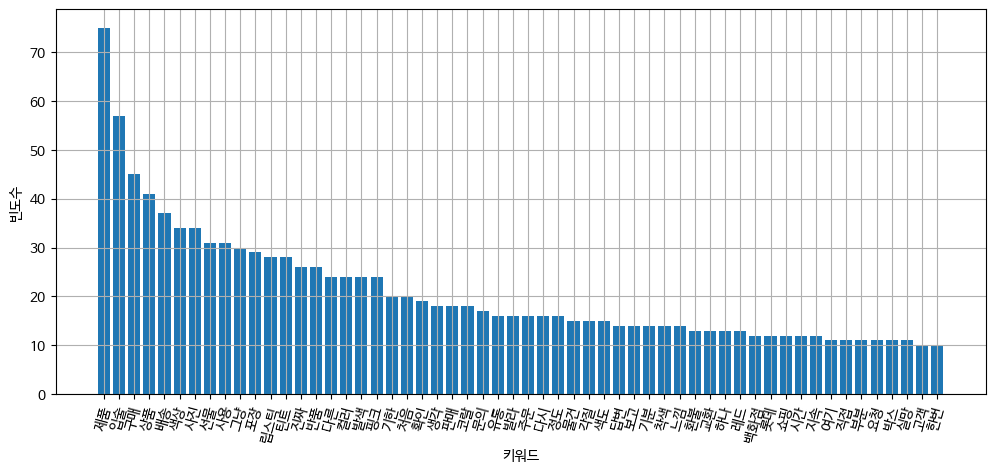

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

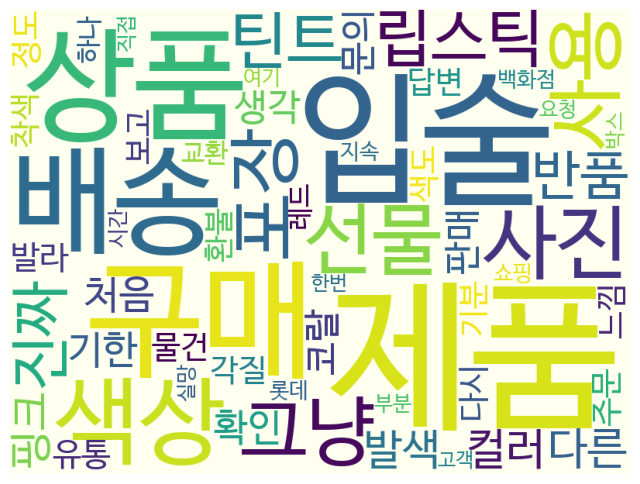

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


## 가격별

In [ ]:
lip[['lprice','star']].describe()

,lprice,star
count,14114.000000,14114.000000
mean,16466.851353,4.735582
std,12499.178022,0.651440
min,2600.000000,1.000000
25%,7660.000000,5.000000
50%,10900.000000,5.000000
75%,21760.000000,5.000000
max,68820.000000,5.000000


### Q1

In [ ]:
price1=lip[lip['lprice']<=7660]
price1

,Unnamed: 0,title,link,lprice,brand,star,message
116,116,롬앤 제로 매트 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,5890,롬앤,5,후기 수정합니다.\n구매하고 며칠은 잘 썼는데 한달지난 지금은 아예 안씁니다. 어떤...
117,117,롬앤 제로 매트 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,5890,롬앤,5,색감 너무 이뻐요~~~♡♡♡♡\n핑크샌드는 베이스로 바르기 좋구요~ 그 조합템 추천...
118,118,롬앤 제로 매트 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,5890,롬앤,5,텍스쳐도 부드럽고 발색도 잘 되고 좋네요^^ 진짜 이름대로 가볍게 매트한게 두껍지도...
119,119,롬앤 제로 매트 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,5890,롬앤,5,배송은 뭐 맘놓고 기다려서 2일만에 왔고 쉘누드 컬러 출시 때부터 베이스 립스틱으로...
120,120,롬앤 제로 매트 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,5890,롬앤,5,색상\n너무 마음에 들어요. 퍼스널 컬러를 봄웜 라이트로 진단받고 나서 립을 꽤 사...
...,...,...,...,...,...,...,...
14109,14109,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,언젠가 누군가에게 받은템~ 써보니 좋더라구요^^ 구매템들 모두 굿~~ 잘쓸께요
14110,14110,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,립밤처럼 막 바르기 딱 좋아요. 다른거 쓰다가 세일할때 미리 구매했어요.
14111,14111,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,항상 쓰는거라 너무 좋아요~발색도 적당히 되고 촉촉함도 오래 지속돼요~
14112,14112,스킨푸드 토마토 젤리 <b>틴트</b> <b>립</b> 4.5g,https://search.shopping.naver.com/gate.nhn?id=...,3000,스킨푸드,5,립밤으로 활용하기엔 다소 건조하지만 자연스러운 발색에 부드러워요!


In [ ]:
message = ' '.join(price1['message'])
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]
message_count=len(message_N)
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 1526
틴트 : 1305
색상 : 1136
구매 : 1013
지속 : 953
제품 : 947
컬러 : 931
발색 : 922
느낌 : 833
핑크 : 740
사용 : 636
진짜 : 620
발림 : 581
발라 : 562
생각 : 543
레드 : 543
착색 : 526
색도 : 496
매트 : 493
립스틱 : 468
정말 : 423
마스크 : 384
쿨톤 : 362
각질 : 360
살짝 : 352
배송 : 342
다른 : 337
가격 : 332
사진 : 330
처음 : 326
조금 : 320
추천 : 310
마음 : 296
정도 : 293
베이스 : 283
보고 : 282
코랄 : 262
오렌지 : 262
하나 : 259
색감 : 256
약간 : 253
색깔 : 248
그냥 : 234
웜톤 : 214
완전 : 209
주문 : 206
벨벳 : 204
아주 : 202
유지 : 202
구입 : 201
부각 : 200
얼굴 : 198


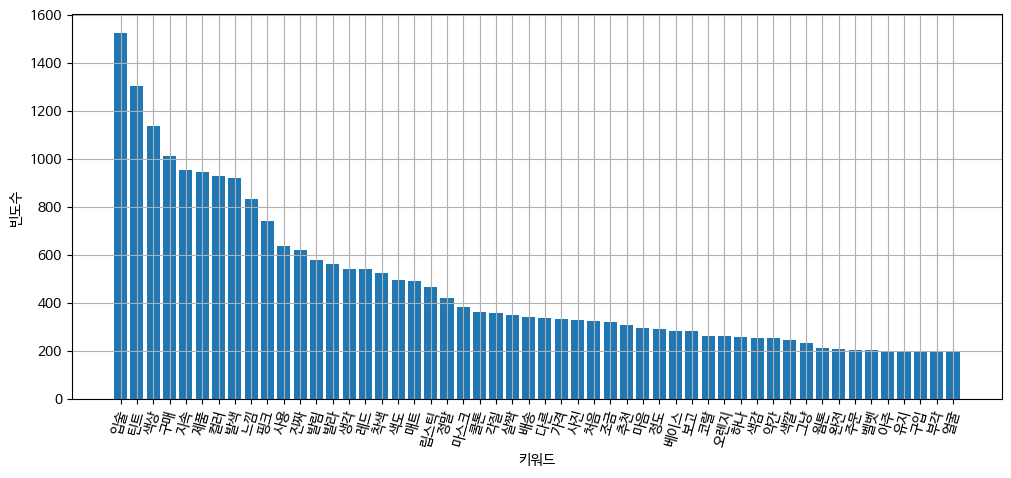

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

In [ ]:
[num / message_count for num in sorted_Values]

[0.018133206583090724,
 0.015507099994058582,
 0.013498900837739886,
 0.012037312102667697,
 0.011324341987998336,
 0.011253044976531401,
 0.01106291961261957,
 0.010955974095419168,
 0.009898401758659615,
 0.008793298080922107,
 0.007557483215495217,
 0.007367357851583388,
 0.006903927277048303,
 0.006678153407403006,
 0.006452379537757709,
 0.006452379537757709,
 0.00625037133860139,
 0.0058938862812667105,
 0.005858237775533242,
 0.005561166894421009,
 0.005026439308418989,
 0.0045630087338839045,
 0.004301586358505139,
 0.00427782068801616,
 0.004182758006060246,
 0.004063929653615353,
 0.004004515477392906,
 0.00394510130117046,
 0.003921335630681481,
 0.003873804289703523,
 0.003802507278236587,
 0.003683678925791694,
 0.003517319232368843,
 0.003481670726635375,
 0.003362842374190482,
 0.0033509595389459926,
 0.0031133028340562057,
 0.0031133028340562057,
 0.003077654328322738,
 0.0030420058225892697,
 0.003006357316855802,
 0.0029469431406333553,
 0.0027805834472105044,
 0.0025

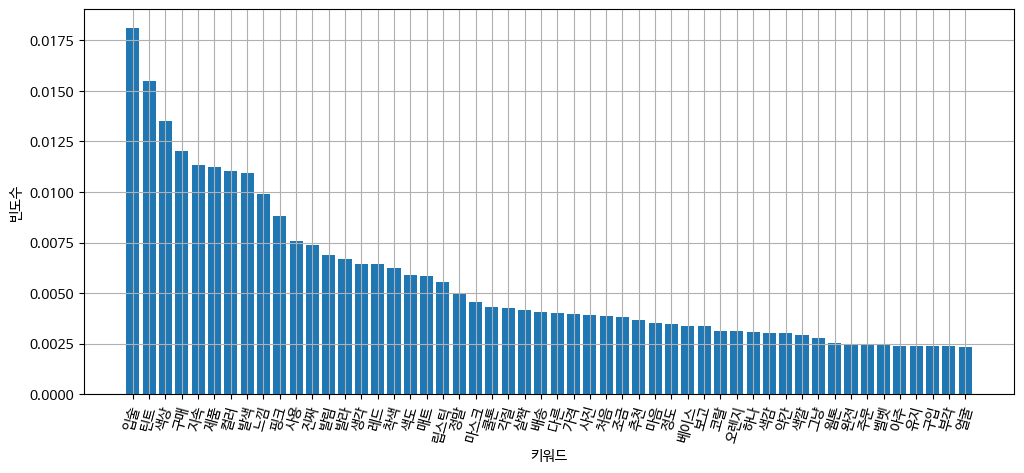

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
sorted_Values = [num / message_count for num in sorted_Values]

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

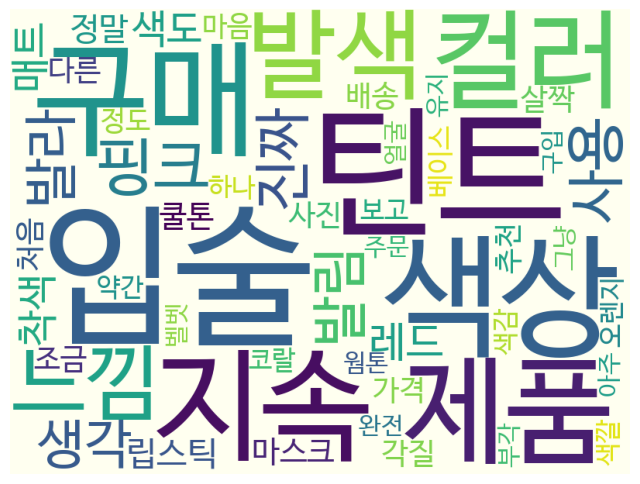

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### q1-q2

In [ ]:
price2=lip[(lip['lprice']>7660) & (lip['lprice']<=10900)]
price2

,Unnamed: 0,title,link,lprice,brand,star,message
676,676,네이처리퍼블릭 허니 멜팅 립 2.7g,https://search.shopping.naver.com/gate.nhn?id=...,7900,네이처리퍼블릭,5,**저는 19호 정도의 여름 쿨톤 라이트입니다!\n\n민스코님 영상 보다가 바로 헉...
677,677,네이처리퍼블릭 허니 멜팅 립 2.7g,https://search.shopping.naver.com/gate.nhn?id=...,7900,네이처리퍼블릭,5,광택이랑 색감 보고 바로 전색상 구매했습니당 그치만 할인해서 왕 저렴하게 샀어요! ...
678,678,네이처리퍼블릭 허니 멜팅 립 2.7g,https://search.shopping.naver.com/gate.nhn?id=...,7900,네이처리퍼블릭,5,광택이랑 색감 보고 바로 전색상 구매했습니당 그치만 할인해서 왕 저렴하게 샀어요! ...
679,679,네이처리퍼블릭 허니 멜팅 립 2.7g,https://search.shopping.naver.com/gate.nhn?id=...,7900,네이처리퍼블릭,5,광택이랑 색감 보고 바로 전색상 구매했습니당 그치만 할인해서 왕 저렴하게 샀어요! ...
680,680,네이처리퍼블릭 허니 멜팅 립 2.7g,https://search.shopping.naver.com/gate.nhn?id=...,7900,네이처리퍼블릭,5,광택이랑 색감 보고 바로 전색상 구매했습니당 그치만 할인해서 왕 저렴하게 샀어요! ...
...,...,...,...,...,...,...,...
14029,14029,클리오 쉬폰 블러 <b>틴트</b> 3.1g,https://search.shopping.naver.com/gate.nhn?id=...,8400,클리오,4,아직 사용전이지만 할인해서 구입했어요.
14030,14030,클리오 쉬폰 블러 <b>틴트</b> 3.1g,https://search.shopping.naver.com/gate.nhn?id=...,8400,클리오,5,색상은 이쁜데 너무 잘묻어나는 단점 ㅠ
14031,14031,클리오 쉬폰 블러 <b>틴트</b> 3.1g,https://search.shopping.naver.com/gate.nhn?id=...,8400,클리오,5,배송도 빠르고 상품도 매우 만족합니다
14032,14032,클리오 쉬폰 블러 <b>틴트</b> 3.1g,https://search.shopping.naver.com/gate.nhn?id=...,8400,클리오,5,넘 넘 넘 발색 좋아요\n정말 만족합니다~~


In [ ]:
message = ' '.join(price2['message'])
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 1598
틴트 : 1442
색상 : 1320
컬러 : 1314
제품 : 977
구매 : 934
느낌 : 924
지속 : 887
발색 : 880
핑크 : 777
사용 : 701
발림 : 645
생각 : 600
진짜 : 587
발라 : 569
매트 : 537
정말 : 507
착색 : 456
벨벳 : 424
립스틱 : 412
색도 : 399
각질 : 386
살짝 : 368
정도 : 360
쿨톤 : 359
레드 : 357
마스크 : 337
배송 : 319
다른 : 317
사진 : 307
보고 : 305
조금 : 305
색감 : 303
추천 : 302
처음 : 301
마음 : 298
베이스 : 296
코랄 : 249
웜톤 : 249
완전 : 246
한번 : 237
편이 : 236
색깔 : 231
유지 : 229
하나 : 227
아주 : 226
가을 : 218
일리 : 208
약간 : 207
고민 : 203
그냥 : 200


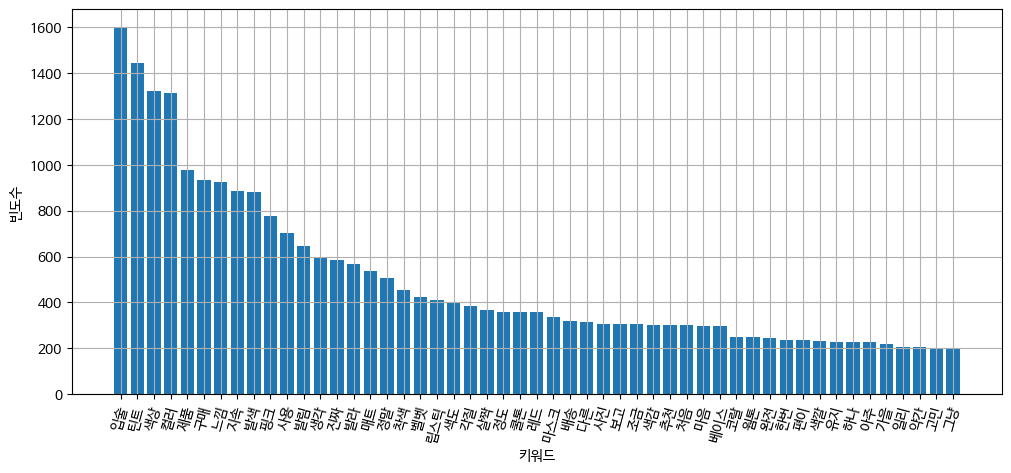

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

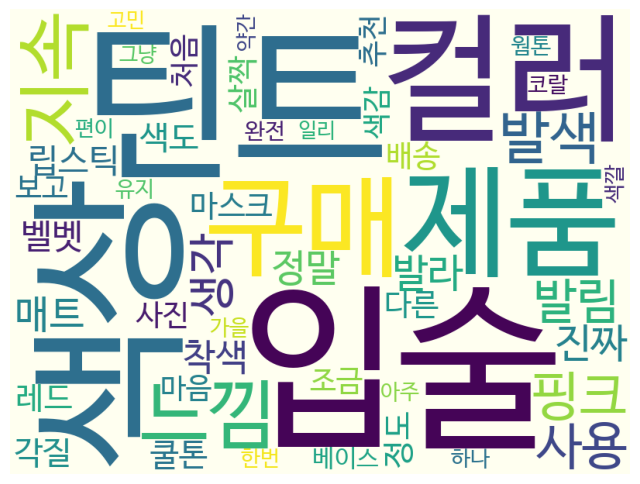

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### q2-q3

In [ ]:
price3=lip[(lip['lprice']>10900) & (lip['lprice']<=21760)]
price3

,Unnamed: 0,title,link,lprice,brand,star,message
0,0,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,4,선물도 주시고 편지도 써주시고 너무좋았어요.\n색상도 원하던 색상이라 맘에 들어요....
1,1,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,우선 포장 이쁘게 해주셔서 감사하고 롯데택배 진짜 배송빨라요 앞으로 백화점화장품이나...
2,2,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,두 제품 다 매끄럽고 부드럽게 발려요. 그리고 많이 건조하지 않고 겉은 매끈 속은 ...
3,3,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,평생을 웜톤으로 생각하고 살았는데 퍼스널 컬러 컨설팅을 해보니 제가 겨울딥톤이라고해...
4,4,맥 파우더 키스 <b>립스틱</b> 3g,https://search.shopping.naver.com/gate.nhn?id=...,18390,맥,5,"*힌스 무드인핸서 리퀴드 글로우, 인뎁스 (찾아보기 힘든 분위기 있는 색감. 아마 ..."
...,...,...,...,...,...,...,...
13869,13869,웨이크메이크 워터 컬러링 퓨어 <b>틴트</b> 3.2g,https://search.shopping.naver.com/gate.nhn?id=...,11880,웨이크메이크,4,싸게 산 것 같아 좋네요. 웨메는 매트립보단 촉촉립이 예쁜 것 같아요.
13870,13870,웨이크메이크 워터 컬러링 퓨어 <b>틴트</b> 3.2g,https://search.shopping.naver.com/gate.nhn?id=...,11880,웨이크메이크,4,좋아요 예쁘네요. 웨메는 매트립보단 촉촉립이 더 좋은 것 같아요.
13871,13871,웨이크메이크 워터 컬러링 퓨어 <b>틴트</b> 3.2g,https://search.shopping.naver.com/gate.nhn?id=...,11880,웨이크메이크,5,3호 4호 구매했고 아래컬러가 4호입니다. 컬러도 이쁘고 발림성도 좋아요! 두개 레...
13872,13872,웨이크메이크 워터 컬러링 퓨어 <b>틴트</b> 3.2g,https://search.shopping.naver.com/gate.nhn?id=...,11880,웨이크메이크,5,우연히 구매했다가 색이 너무 맘에 들어서 다 쓰고 1+1으로 두통 더 구매했어요 다...


In [ ]:
message = ' '.join(price3['message'])
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

입술 : 1973
색상 : 1759
컬러 : 1583
립스틱 : 1332
틴트 : 1262
느낌 : 1216
제품 : 1184
구매 : 1163
발색 : 1095
핑크 : 955
사용 : 942
매트 : 841
정말 : 762
발라 : 758
발림 : 753
생각 : 725
진짜 : 722
지속 : 674
코랄 : 600
레드 : 542
착색 : 508
사진 : 444
다른 : 434
각질 : 427
색감 : 423
처음 : 423
쿨톤 : 414
케이스 : 410
정도 : 409
마음 : 404
보고 : 386
조금 : 385
살짝 : 384
색도 : 381
베이스 : 377
추천 : 370
배송 : 366
약간 : 334
하나 : 320
그냥 : 298
얼굴 : 296
피부 : 295
웜톤 : 292
한번 : 268
벨벳 : 265
립밤 : 265
아주 : 261
마스크 : 261
편이 : 253
일리 : 253
선물 : 251
오렌지 : 251


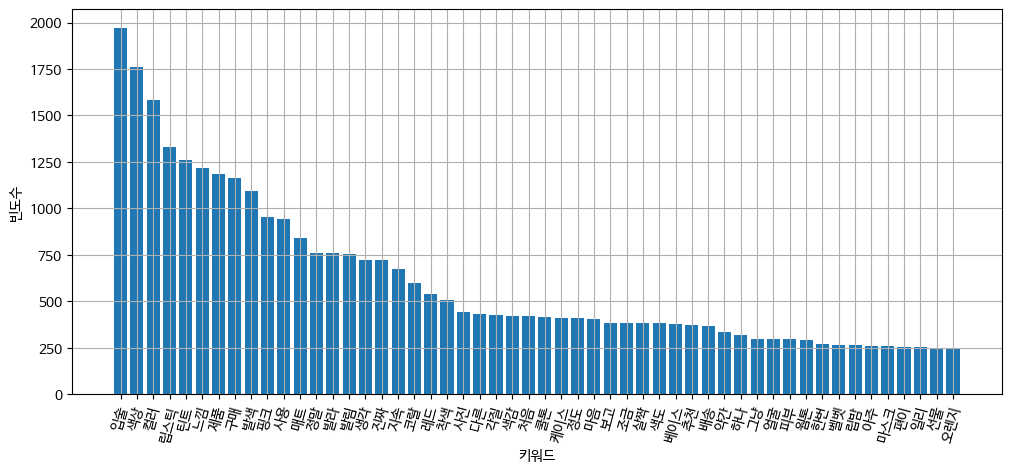

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

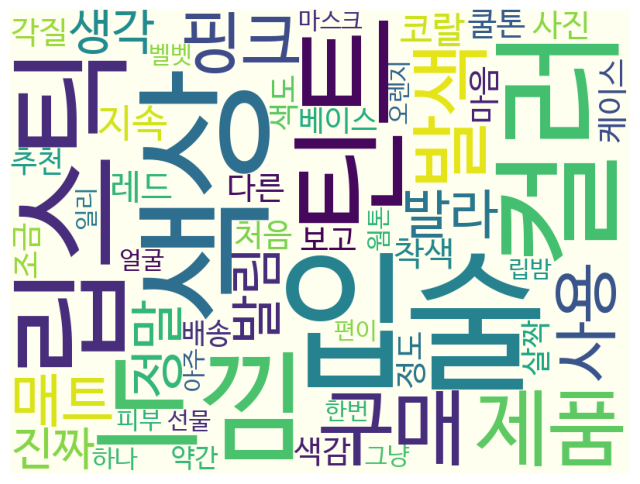

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### q3-


In [ ]:
price4=lip[lip['lprice']>21760]
price4

,Unnamed: 0,title,link,lprice,brand,star,message
80,80,크리니크 올모스트 <b>립스틱</b> 1.9g,https://search.shopping.naver.com/gate.nhn?id=...,22180,크리니크,5,일단 플럼색에 아주 충실한 컬러예요. 저처럼 딥톤이신분들에게 잘 어울릴 데일리 립이...
81,81,크리니크 올모스트 <b>립스틱</b> 1.9g,https://search.shopping.naver.com/gate.nhn?id=...,22180,크리니크,4,보습력은 최고인 것 같습니다.\n최근 사용했던 틴트나 립스틱은 상대적으로 건조하고 ...
82,82,크리니크 올모스트 <b>립스틱</b> 1.9g,https://search.shopping.naver.com/gate.nhn?id=...,22180,크리니크,5,어플리케이터가 슬림하고 세련됐네요 발색도 맘에 듭니다
83,83,크리니크 올모스트 <b>립스틱</b> 1.9g,https://search.shopping.naver.com/gate.nhn?id=...,22180,크리니크,4,가을에 바르기 좋은 컬러인거같아요 약간 버건디? 발림은 좋아요!
84,84,크리니크 올모스트 <b>립스틱</b> 1.9g,https://search.shopping.naver.com/gate.nhn?id=...,22180,크리니크,5,생각했던 것보다 연하고 주황끼가 돌아요. 생얼에 바르기 좋을 듯
...,...,...,...,...,...,...,...
13949,13949,입생로랑 따뚜아쥬 꾸뛰르 타투 <b>틴트</b> 6ml,https://search.shopping.naver.com/gate.nhn?id=...,43900,입생로랑,5,저렴하게 파는 곳 찾으려고 네이버 쇼핑 뒤지다가 50% 세일하길래 바로 구매해버렸어...
13950,13950,입생로랑 따뚜아쥬 꾸뛰르 타투 <b>틴트</b> 6ml,https://search.shopping.naver.com/gate.nhn?id=...,43900,입생로랑,5,색은 코랄에 붉은끼가 좀더 도는 색인것 같아요ㅎ\n그래서 웜톤을 위한거다 쿨톤을 위...
13951,13951,입생로랑 따뚜아쥬 꾸뛰르 타투 <b>틴트</b> 6ml,https://search.shopping.naver.com/gate.nhn?id=...,43900,입생로랑,5,빨간색 립종류 너무 많은데 생노랑 요거 탐나서 또 겟 했네요~컬러 밝아서 분위기 전...
13952,13952,입생로랑 따뚜아쥬 꾸뛰르 타투 <b>틴트</b> 6ml,https://search.shopping.naver.com/gate.nhn?id=...,43900,입생로랑,5,색깔보고 반해서 주문했어요 역시나 실제로도 산뜻하고 청순한 색깔이에요 다만 봄이나 ...


In [ ]:
message = ' '.join(price4['message'])
nlp = Okt()
message_N = nlp.nouns(message)
message_N = [word for word in message_N if word != ('립틴트','립스틱')]
message_count=len(message_N)
count = Counter(message_N)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

색상 : 1684
입술 : 1432
컬러 : 1344
구매 : 1233
립스틱 : 1043
제품 : 991
느낌 : 957
발색 : 924
매트 : 736
발림 : 712
사용 : 702
지속 : 657
선물 : 652
핑크 : 648
틴트 : 609
레드 : 576
생각 : 558
배송 : 554
발라 : 506
정말 : 505
진짜 : 430
마음 : 427
색도 : 425
케이스 : 398
다른 : 364
추천 : 362
하나 : 355
포장 : 340
조금 : 335
살짝 : 323
색감 : 305
각질 : 304
구입 : 300
보고 : 300
주문 : 283
헤라 : 281
코랄 : 277
쿨톤 : 275
정도 : 272
처음 : 269
사은 : 268
아주 : 255
사진 : 253
이번 : 252
마스크 : 248
약간 : 244
샘플 : 244
가을 : 243
웜톤 : 243
착색 : 243
고민 : 242
립밤 : 241
얼굴 : 226
기분 : 222
색력 : 220
가격 : 219


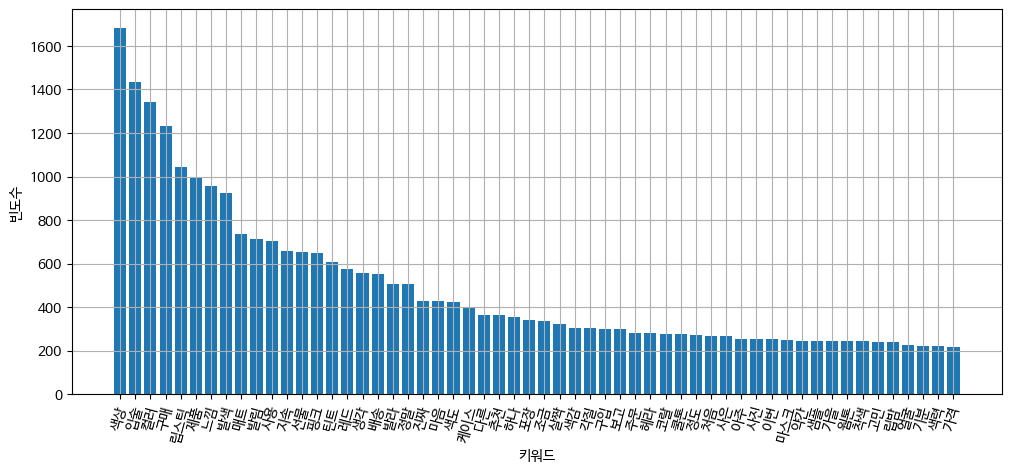

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

In [ ]:
[num / message_count for num in sorted_Values]

[0.01895179895787614,
 0.016115781536626263,
 0.01512542624666599,
 0.013876228096829738,
 0.01173796099350642,
 0.011152751049438987,
 0.010770113778317972,
 0.010398730544582869,
 0.008282971516031376,
 0.008012874618769483,
 0.007900334244910361,
 0.007393902562544313,
 0.007337632375614752,
 0.007292616226071103,
 0.006853708768020527,
 0.006482325534285425,
 0.006279752861339006,
 0.0062347367117953564,
 0.0056945429172715716,
 0.005683288879885659,
 0.004839236075942244,
 0.004805473963784507,
 0.004782965889012683,
 0.004479106879593054,
 0.004096469608472039,
 0.004073961533700215,
 0.00399518327199883,
 0.0038263727112101465,
 0.0037701025242805855,
 0.0036350540756496393,
 0.00343248140270322,
 0.0034212273653173074,
 0.003376211215773659,
 0.003376211215773659,
 0.0031848925802131513,
 0.003162384505441327,
 0.0031173683558976782,
 0.003094860281125854,
 0.0030610981689681172,
 0.003027336056810381,
 0.0030160820194244683,
 0.00286977953340761,
 0.0028472714586357858,
 0.002

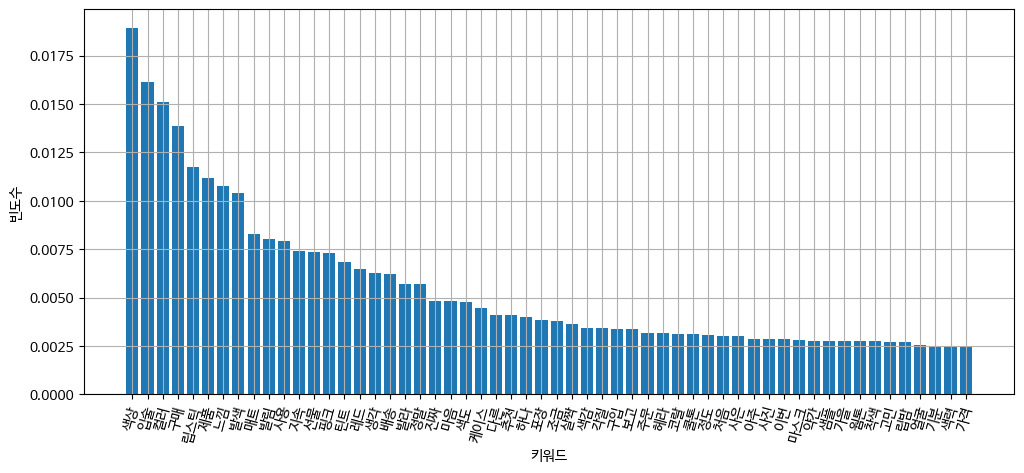

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
sorted_Values = [num / message_count for num in sorted_Values]

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

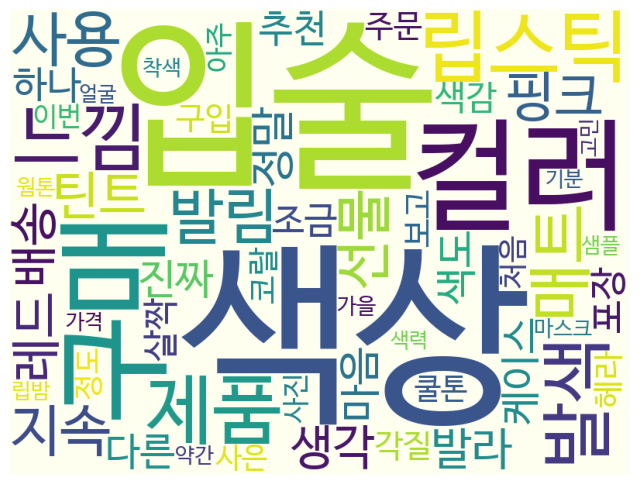

In [ ]:
wc = WordCloud('NanumBarunGothic', background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()